In [5]:
from MagicCube import MagicCube
import time
import matplotlib.pyplot as plt

In [6]:

def sideways_move_hill_climbing(cube, max_iter=1000, max_sideways=10):
    iteration = 0
    sideways_moves = 0
    history = []
    start_time = time.time()

    # Menyimpan nilai objective function awal
    current_fx = cube.objective_function()
    history.append(current_fx)

    while iteration < max_iter:
        next_states = cube.next_states()
        best_state = None
        best_neighbor_fx = current_fx

        # Cari state terbaik di neighbor
        for next_state in next_states:
            neighbor_fx = next_state.objective_function()
            print(f"Iterasi {iteration}: Current: {current_fx}, Neighbor: {neighbor_fx}")

            if neighbor_fx < best_neighbor_fx:
                best_state = next_state
                best_neighbor_fx = neighbor_fx

        # Jika menemukan neighbor lebih baik, perbarui state
        if best_state:
            cube = best_state
            current_fx = best_neighbor_fx
            history.append(current_fx)
            sideways_moves = 0  # Reset sideways move counter
        elif sideways_moves < max_sideways:
            # Jika tidak menemukan neighbor yang lebih baik, lakukan sideways move
            sideways_moves += 1
            print(f"Sideways move #{sideways_moves} at Iterasi {iteration}")
        else:
            # Jika tidak ada peningkatan dan sideways limit tercapai, berhenti
            print("Tidak ada solusi yang lebih baik, berhenti pada local maximum atau plateau")
            break
        
        iteration += 1

        # Jika solusi valid ditemukan, berhenti
        if cube.is_valid_magic_cube():
            print(f"Solusi ditemukan setelah {iteration} iterasi.")
            break

    duration = time.time() - start_time
    print(f"Final State: {current_fx}")
    return cube, history, iteration, duration

In [7]:
def visualize_experiment(initial_cube, final_cube, history):
    print("Initial State:")
    initial_cube.visualize()

    print("Final State:")
    final_cube.visualize()

    plt.plot(range(len(history)), history, color='blue')
    plt.title('Objective Function terhadap Banyak Iterasi')
    plt.xlabel('Iterasi')
    plt.ylabel('Objective Function (f(x))')
    plt.grid(True)
    plt.show()

Iterasi 0: Current: 8661, Neighbor: 8756
Iterasi 0: Current: 8661, Neighbor: 8661
Iterasi 0: Current: 8661, Neighbor: 8661
Iterasi 0: Current: 8661, Neighbor: 8661
Iterasi 0: Current: 8661, Neighbor: 8581
Iterasi 0: Current: 8661, Neighbor: 8549
Iterasi 0: Current: 8661, Neighbor: 8515
Iterasi 0: Current: 8661, Neighbor: 8661
Iterasi 0: Current: 8661, Neighbor: 8661
Iterasi 0: Current: 8661, Neighbor: 8661
Iterasi 1: Current: 8515, Neighbor: 8515
Iterasi 1: Current: 8515, Neighbor: 8541
Iterasi 1: Current: 8515, Neighbor: 8493
Iterasi 1: Current: 8515, Neighbor: 8514
Iterasi 1: Current: 8515, Neighbor: 8482
Iterasi 1: Current: 8515, Neighbor: 8515
Iterasi 1: Current: 8515, Neighbor: 8515
Iterasi 1: Current: 8515, Neighbor: 8515
Iterasi 1: Current: 8515, Neighbor: 8600
Iterasi 1: Current: 8515, Neighbor: 8515
Iterasi 2: Current: 8482, Neighbor: 8482
Iterasi 2: Current: 8482, Neighbor: 8482
Iterasi 2: Current: 8482, Neighbor: 8482
Iterasi 2: Current: 8482, Neighbor: 8482
Iterasi 2: Curre

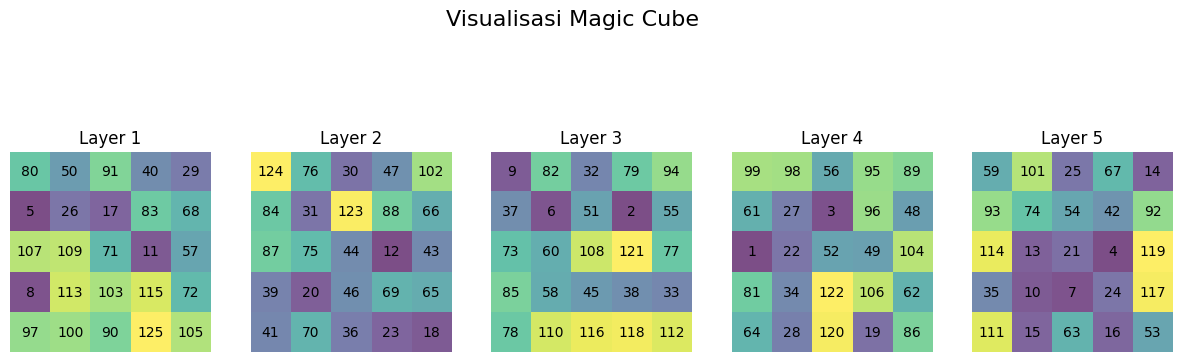

Final State:


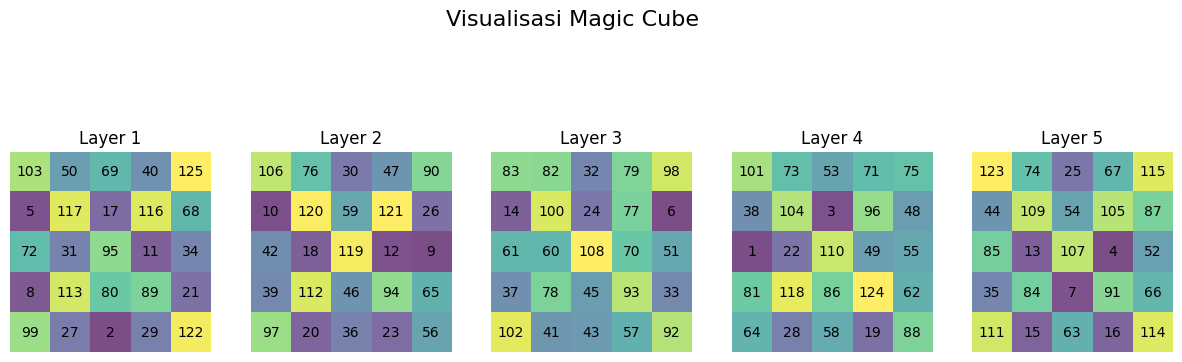

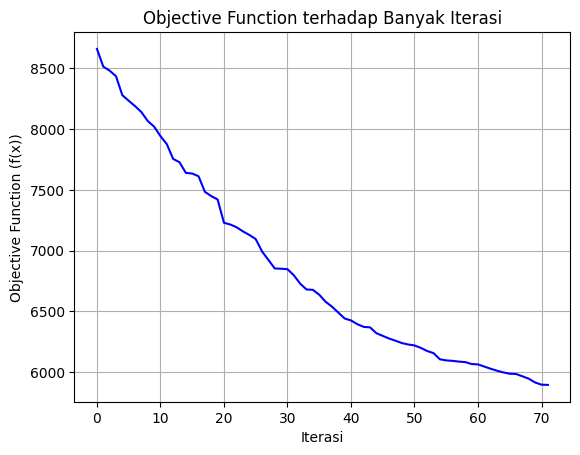

In [8]:

if __name__ == "__main__":
    initial_cube = MagicCube(n=5)

    final_cube, history, iterations, duration = sideways_move_hill_climbing(initial_cube)

    print(f"Total Iterasi: {iterations}")
    print(f"Durasi: {duration:.2f} detik")
    visualize_experiment(initial_cube, final_cube, history)